# <center> **RÚT NGẮN TIẾN ĐỘ DỰ ÁN** </center><font size="3"><center>Crashing Project</center></font>
## Lý thuyết
- Việc rút ngắn dự án luôn luôn phải đánh đổi bới chi phí.
- Vấn đề đặt ra : Làm thế nào rút ngắn tiến độ với chi phí tăng lên là nhỏ nhất.
- Cách giải: Phải rút ngắn tối đa thời gian của các dự án nằm trên đường găng và giữ nguyên tối đa các dự án không nằm trên đường Gantt
- Tham khảo: [Youtube](https://www.youtube.com/watch?v=qNSTP88FHWA) 

## Bảng ví dụ:
<table style="text-align:center" solid black>
  <tr style="font-weight:bold">
    <td rowspan = 2>Công việc</td>
    <td rowspan = 2> Công tác trước</td>
    <td colspan = 2> Thời gian (Tuần) </td>
    <td colspan = 2> Chi phí ($) </td>
  </tr>
  <tr style="font-weight:bold">
    <td> B.thường </td>
    <td> Rút ngắn </td>
    <td> B.thường </td>
    <td> Rút ngắn </td>
  </tr>
  <tr>
    <td>A</td>
    <td>-</td>
    <td>2</td>
    <td>1</td>
    <td>22.000</td>
    <td>23.000</td>
  </tr>
  <tr>
    <td>B</td>
    <td>-</td>
    <td>3</td>
    <td>1</td>
    <td>30.000</td>
    <td>34.000</td>
  </tr>
  <tr>
    <td>C</td>
    <td>A</td>
    <td>2</td>
    <td>1</td>
    <td>26.000</td>
    <td>27.000</td>
  </tr>
  <tr>
    <td>D</td>
    <td>B</td>
    <td>4</td>
    <td>3</td>
    <td>48.000</td>
    <td>49.000</td>
  </tr>
  <tr>
    <td>E</td>
    <td>C</td>
    <td>4</td>
    <td>2</td>
    <td>56.000</td>
    <td>58.000</td>
  </tr>
  <tr>
    <td>F</td>
    <td>C</td>
    <td>3</td>
    <td>2</td>
    <td>30.000</td>
    <td>30.500</td>
  </tr>
  <tr>
    <td>G</td>
    <td>D,E</td>
    <td>5</td>
    <td>2</td>
    <td>80.000</td>
    <td>86.000</td>
  </tr>
  <tr>
    <td>H</td>
    <td>F,G</td>
    <td>2</td>
    <td>1</td>
    <td>16.000</td>
    <td>19.000</td>
  </tr>
  <tr>
    <td colspan = 4 >Tổng chi phí</td>
    <td><b>308.000</b></td>
    <td></td>
  </tr>
</table>

In [1]:
import pandas as pd
bang1 = pd.read_csv("bangvd.csv")
#print(bang1)

## Cách giải
### Bước 1: Tính chi phí rút ngắn đơn vị và thời gian được phép rút ngắn

<blockquote class="green">

$\text{Thời gian rút ngắn đơn vị} = \text{Thời gian bình thường} - \text{Thời gian rút ngắn}$

$\text{Chi phí rút ngắn đơn vị} = \frac{\text{Chi phí bình thường} - \text{Chi phí rút ngắn}}{\text{Thời gian rút ngắn đơn vị}}$

</blockquote>

In [2]:
## Khai bao du lieu
tenda = list(bang1.iloc[:,0]) # Tên dự án
#print("Tên dự án: " + str(tenda))

cost1 = list(bang1.iloc[:,-2]) # Chi phí bình thường
#print(cost1)
cost2 = list(bang1.iloc[:,-1]) # Chi phí rút ngắn
#print(cost2)

tg1 = list(bang1.iloc[:,-4]) # Thời gian bình thường
#print(tg1)
tg2 = list(bang1.iloc[:,-3]) # Thời gian rút ngắn
#print(tg2)

## Tính thời gian rút ngắn đơn vị
tg_dv = [tg1[i]-tg2[i] for i in range(len(tg1))]
#print("Thời gian rút ngắn: " + str(tg_dv))

## Tính chi phí rút ngắn đơn vị
cost_dv = [(cost2[i]-cost1[i])*1000/tg_dv[i] for i in range(len(cost1))]
#print("Chi phí rút ngắn: " + str(cost_dv))

data_need = pd.DataFrame(list(zip(tenda,tg_dv,cost_dv)), columns = ["Tên dự án","Tg có thể rút ngắn (tuần)","Cp rút ngắn đơn vị ($)"])
print(data_need) # Xuat ket qua

  Tên dự án  Tg có thể rút ngắn (tuần)  Cp rút ngắn đơn vị ($)
0         A                          1                  1000.0
1         B                          2                  2000.0
2         C                          1                  1000.0
3         D                          1                  1000.0
4         E                          2                  1000.0
5         F                          1                   500.0
6         G                          3                  2000.0
7         H                          1                  3000.0


### Bước 2: Vẽ Critical Path (sơ đồ mạng AON)

Đầu tiên ta thêm các vector để vẽ path theo tuần tự:
- Vector chứa điểm start: Lọc các điểm mà công tác trước là "-"
- Vector trung gian: Lọc các điểm mà công tác trước khác "-" và có độ dài ký tự là 1
- Vector chứa điểm cuối: Lọc các điểm mà không có mặt trong cột công tác trước

In [3]:
pretenda = list(bang1.iloc[:,1]) # Tên dự án liền trước
#print(pretenda)

Start_point = [i for i in tenda if pretenda[tenda.index(i)] == '-'] #Tìm start point
#print(Start_point)

# Liệt kê các vector:
##Thêm vector start point
vector = [["Start",i] for i in Start_point] 
#print(vector)

##Thêm vector trung gian
for i in range(len(pretenda)): 
    if pretenda[i] != "-" and len(pretenda[i]) == 1:
        vector.append([pretenda[i],tenda[i]])
    elif len(pretenda[i]) > 1:
        Stats = pretenda[i].split(",")
        for k in range(len(Stats)):
            vector.append([Stats[k],tenda[i]]) 
#print(vector)

##Tìm end point
End_point = []
for i in range(len(tenda)):
    a = 0
    for k in range(len(pretenda)):
        if tenda[i] in pretenda[k]:
            a += 1
    if a == 0:
        End_point.append(tenda[i])
#print(End_point)

vector.extend([[i,'End'] for i in End_point])
print(vector)

[['Start', 'A'], ['Start', 'B'], ['A', 'C'], ['B', 'D'], ['C', 'E'], ['C', 'F'], ['D', 'G'], ['E', 'G'], ['F', 'H'], ['G', 'H'], ['H', 'End']]


Sau khi đã có danh sách các vector, ta dùng [networkx](https://networkx.org/) để tiến hành vẽ sơ đồ AON. Mục đích vẽ nhằm xác định các con đường.

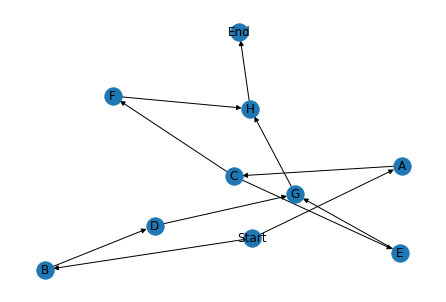

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_edges_from(vector)

nx.draw(G, with_labels=True)
plt.show()

### Bước 3: Liệt kê các con đường

In [5]:
#Xuất ra các con đường
def all_paths(G):
    roots = (v for v, d in G.in_degree() if d == 0)
    leaves = [v for v, d in G.out_degree() if d == 0]
    all_paths = []
    for root in roots:
        paths = nx.all_simple_paths(G, root, leaves)
        all_paths.extend(paths)
    return all_paths

paths = all_paths(G)
print(paths)

number_path = len(paths)


[['Start', 'A', 'C', 'E', 'G', 'H', 'End'], ['Start', 'A', 'C', 'F', 'H', 'End'], ['Start', 'B', 'D', 'G', 'H', 'End']]


Từ các đường đi, tiến hành xác định [đường Gantt](https://vietnambiz.vn/so-do-gantt-gantt-chart-la-gi-cach-lap-so-do-gantt-20190812095641859.htm) là đường mà có **thời gian hoàn thành dự án** là lớn nhất.  

In [6]:
def Tim_gantt(paths,tenda,tg1): # Rà thời gian thực hiện dự án của các con đường 
    g_list = []
    for i in range(len(paths)):
        g_val = []
        for k in range(1,len(paths[i])-1):
            for j in range(len(tenda)):
                if tenda[j] == paths[i][k]:
                    g_val.append(tg1[j])
        g_list.append(g_val)
    return g_list

def Gantt(paths,tenda,tg1): # Trả về số thứ tự của đường găng
    g_list = Tim_gantt(paths,tenda,tg1)
    #print(g_list)

    g_val_list = [sum(i) for i in g_list]
    print("Thời gian hoàn thành: "+ str(g_val_list))

    max_tg = max(g_val_list)
    #print(max_tg)

    Gantt = [g_val_list.index(max_tg)]
    return Gantt


Gantt = Gantt(paths,tenda,tg1)
print("Đường Gantt là đường số " + str(Gantt[0]+1))
   

Thời gian hoàn thành: [15, 9, 14]
Đường Gantt là đường số 1


### Bước 4: Xét các trường hợp đường Gantt
Xét các trường hợp giả sử sau quá trình rút ngắn từng đường là đường Gantt. Khi đó các dự án nằm trên sẽ được giảm tối thiểu và các dự án không nằm trên đường Gantt phải được giữ nguyên tối đa.
> <u>`Các điều kiện ràng buộc:`</u>
> - Thời gian rút ngắn phải nằm trong phạm vị cho phép (đề cho)
> - Thời gian hoàn thành sau rút ngắn của các đường không Gantt phải bé hơn hoặc bằng đường Gantt
> - Thời gian rút ở đường Gantt phải tối đa
> - Chi phí rút ngắn phải tối thiểu

In [7]:
print(data_need)

  Tên dự án  Tg có thể rút ngắn (tuần)  Cp rút ngắn đơn vị ($)
0         A                          1                  1000.0
1         B                          2                  2000.0
2         C                          1                  1000.0
3         D                          1                  1000.0
4         E                          2                  1000.0
5         F                          1                   500.0
6         G                          3                  2000.0
7         H                          1                  3000.0



#### <u>Trường hợp 1: Đường thứ nhất là đường Gantt</u> 

In [8]:
print("Đường thứ nhất: "+str(paths[0]))

Đường thứ nhất: ['Start', 'A', 'C', 'E', 'G', 'H', 'End']


Đầu tiên khai báo các biến là các số ngày giảm ở các công việc. Sau đó thiết lập và giải hệ bất phương trình nhằm tìm các hiệu số thời gian giảm thỏa mãn điều kiện đề bài. 

In [9]:
import sys
sys.path.insert(0, 'C:/Users/Truong Phi/OneDrive/Máy tính/QLDA/quick/crashing_time/solveinequal')
from sinequal import *

biens = ["a","b","c","d","e","f","g","h"] #Đặt ẩn là hiệu số thời gian của các công việc theo thứ tụ

he_bpt = [
    # Các hiệu số phải lớn hơn hoặc bằng 0
    "a>=0","b>=0","c>=0","d>=0",
    "e>=0","f>=0","g>=0","h>=0",
    # Thời gian rút ngắn phải nằm trong phạm vi đề bài cho
    "a<=1","b<=2","c<=1","d<=1",
    "e<=2","f<=1","g<=3","h<=1",
    # Thời gian hoàn thành sau rút ngắn của các đường không Gantt phải bé hơn hoặc bằng đường Gantt
    "-e-g+f>=-6","-a-c-e+b+d>=-1"
]
#print(giaihebpt(he_bpt,biens))
hs_cp = giaihebpt(he_bpt,biens) #Hệ số chi phí
print(hs_cp[:10:]) #Xem 10 kết quả đầu tiên

[[0, 0, 0, 0, 0, 0, 0, 0]]
[[0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0], [0, 2, 0, 0, 0, 0, 0, 0], [1, 2, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0], [0, 2, 1, 0, 0, 0, 0, 0]]


Sau khi đã có hệ số chi phí tiến hành tính chi phí rút ngắn nhằm tìm ra chi phí rút ngắn tối thiểu và thời gian rút ngắn đường Gantt.

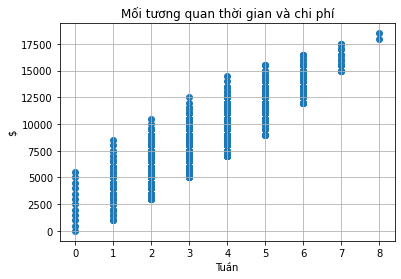

In [10]:
def cp_rutz(hs_cp,cost_dv): #Tính chi phí rút ngắn của các trường hợp rút ngắn
    cp_rut = []
    for i in range(len(hs_cp)):
        a = 0
        for k in range(len(cost_dv)):
            a += hs_cp[i][k]*cost_dv[k]
        cp_rut.append(a)
    return cp_rut
cp_rut = cp_rutz(hs_cp,cost_dv)     
#print(cp_rut[:10:])

def tg_rutz(hs_cp,lum): #Tính thời gian rút ngắn của các trường hợp rút ngắn
    tg_rut = []
    for i in range(len(hs_cp)):
        a = 0
        for k in lum:
            a += hs_cp[i][k]
        tg_rut.append(a)
    return tg_rut

#Tính thời gian trên đường Gantt chính là thời gian rút gọn
lum1 = [0,2,4,6,7] #Thứ tự của đường Gantt ['Start', 'A', 'C', 'E', 'G', 'H', 'End'] theo thứ tự A,B,C,D,E,F,G,H 
tg_rut = tg_rutz(hs_cp,lum1)
#print(tg_rut[:10:])

# Vẽ đồ thị dotplot để khảo sát mối tương quan
import matplotlib.pyplot as plt
plt.title("Mối tương quan thời gian và chi phí")
plt.scatter(tg_rut,cp_rut)
plt.xlabel("Tuần")
plt.ylabel("$")
plt.grid()
plt.show()

Từ đồ thị trên ta thấy rằng các điểm tối ưu là các điểm mà chi phí thấp nhất tại các mốc thời gian. Từ đó ta sẽ lọc ra các điểm tối ưu này bằng cách tìm các giá trị min của chi phí tại các mốc thời gian. 

In [11]:
tg_list = list(range(min(tg_rut),max(tg_rut)+1))
#print(tg_list)

def FindMin(tg_list,tg_rut,cp_rut):
    rs = []
    for j in range(len(tg_list)):
        index = [] #index của mốc thời gian
        for i in range(len(tg_rut)):
            if tg_rut[i] == tg_list[j]:
                index.append(i)
        #print(index)

        cp = [cp_rut[i] for i in index] # Chi phí của các index tương ứng
        #print(cp)

        cp_min = min(cp)
        #print(cp_min)

        #Index của chi phí min
        index_min = index[cp.index(cp_min)]
        #print(index_min)
        rs.append([index_min,cp_min])
    return rs

cp_min_list = FindMin(tg_list,tg_rut,cp_rut) #List [index của hs_cp, chi phí min]
#print(cp_min_list)

cp_min = [cp_min_list[i][1] for i in range(len(cp_min_list))] # Trích xuất chi phí min từ list trên
print("Chi phí min: "+str(cp_min))

Chi phí min: [0.0, 1000.0, 3000.0, 5000.0, 7000.0, 9000.0, 12000.0, 15000.0, 18000.0]


Khi đã có các giá trị chi phí tối thiểu, cần xác định xem chúng xuất hiện duy nhất một lần hay có lặp lại.

In [12]:
def TruyXuat(cp_val,tg_val,cp_rut,tg_rut): #Truy xuất index của mức phí và thời gian
    index1 = []
    for i in range(len(cp_rut)):
        if cp_rut[i] == cp_val:
            index1.append(i)
    
    index2 = []
    for k in index1:
        if tg_rut[k] == tg_val:
            index2.append(k)
    return index2

dem = [] # Đếm xem mỗi trường hợp min xuất hiện bao nhiêu lần trong mốc thời gian của nó
index_min_lap = [] # Index của các lần lặp
for i in range(len(cp_min)): 
    index_min_lap.append(TruyXuat(cp_min[i],i,cp_rut,tg_rut))
    dem.append(len(TruyXuat(cp_min[i],i,cp_rut,tg_rut)))

print("Số lần lặp của giá trị min: "+str(dem))

index_min_lapstr = [list(map(str,i)) for i in index_min_lap] #Chuyển list of list int sang list of list string
#print(index_min_lapstr)

index_min_laps = [",".join(i) for i in index_min_lapstr] #Chuyển list string thành các string
#print("Index tương ứng: "+str(index_min_laps))

Số lần lặp của giá trị min: [1, 3, 7, 7, 7, 4, 7, 4, 1]


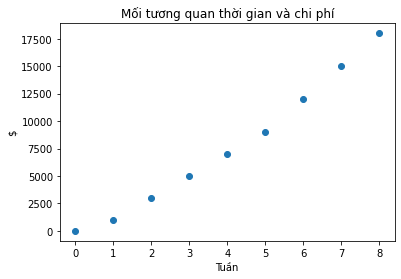

   Thời gian rút ngắn (tuần)  Chi phí rút ngắn ($)  Số cách rút ngắn
0                          0                   0.0                 1
1                          1                1000.0                 3
2                          2                3000.0                 7
3                          3                5000.0                 7
4                          4                7000.0                 7
5                          5                9000.0                 4
6                          6               12000.0                 7
7                          7               15000.0                 4
8                          8               18000.0                 1


In [13]:
index_min = [cp_min_list[i][0] for i in range(len(cp_min_list))] # Trích xuất index của chi phí min từ list trên
#print(index_min)

#Thực hiện vẽ lại đồ thị với chi phí đã lọc
plt.title("Mối tương quan thời gian và chi phí")
plt.scatter(tg_list,cp_min)
plt.xlabel("Tuần")
plt.ylabel("$")
plt.show()

#Xuất bảng giá trị thời gian rút gọn và chi phí tối thiểu
data_gantt1 = pd.DataFrame(list(zip(tg_list,cp_min,dem)),columns=["Thời gian rút ngắn (tuần)","Chi phí rút ngắn ($)","Số cách rút ngắn"])
print(data_gantt1)

#### Trường hợp 2: Đường thứ hai là đường Gantt
> `Cũng tương tự như trường hợp một, thực hiện các quá trình:`
> - Giải hệ bất phương trình để tìm hiệu số thời gian
> - Tính chi phí rút ngắn và thời gian rút ngắn cho cho từng trường hợp
> - Lọc ra chi phí min ứng với các mốc thời gian tương ứng

<u>*Giải hệ bất phương trình*</u>

In [14]:
biens = ["a","b","c","d","e","f","g","h"] #Đặt ẩn là hiệu số thời gian của các công việc theo thứ tụ

he_bpt = [
    # Các hiệu số phải lớn hơn hoặc bằng 0
    "a>=0","b>=0","c>=0","d>=0",
    "e>=0","f>=0","g>=0","h>=0",
    # Thời gian rút ngắn phải nằm trong phạm vi đề bài cho
    "a<=1","b<=2","c<=1","d<=1",
    "e<=2","f<=1","g<=3","h<=1",
    # Thời gian hoàn thành sau rút ngắn của các đường không Gantt phải bé hơn hoặc bằng đường Gantt
    "-e-g+f<=-6","-a-c-f+b+d+g>=5"
]
#print(giaihebpt(he_bpt,biens))
hs_cp1 = giaihebpt(he_bpt,biens) #Hệ số chi phí
print(hs_cp1[:10:]) #Xem 10 kết quả đầu tiên

[]


Kết quả giải bất phương trình cho thấy rỗng, vậy khả năng đường thứ 2 là đường Gantt là không thể xảy ra.

#### Trường hợp 3: Đường thứ ba là đường Gantt
<u>*Giải hệ bất phương trình*</u>

In [15]:
biens = ["a","b","c","d","e","f","g","h"] #Đặt ẩn là hiệu số thời gian của các công việc theo thứ tụ

he_bpt = [
    # Các hiệu số phải lớn hơn hoặc bằng 0
    "a>=0","b>=0","c>=0","d>=0",
    "e>=0","f>=0","g>=0","h>=0",
    # Thời gian rút ngắn phải nằm trong phạm vi đề bài cho
    "a<=1","b<=2","c<=1","d<=1",
    "e<=2","f<=1","g<=3","h<=1",
    # Thời gian hoàn thành sau rút ngắn của các đường không Gantt phải bé hơn hoặc bằng đường Gantt
    "-b-d+a+c+e>=1","-a-c-f+b+d+g<=5"
]
#print(giaihebpt(he_bpt,biens))
hs_cp2 = giaihebpt(he_bpt,biens) #Hệ số chi phí
print(hs_cp2[:10:]) #Xem 10 kết quả đầu tiên

[[1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0], [1, 0, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0], [1, 1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 0, 0], [1, 0, 1, 0, 1, 0, 0, 0]]


<u>*Tính chi phí rút ngắn và thời gian rút ngắn*</u>

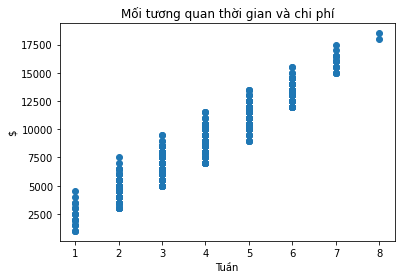

In [16]:
cp_rut2 = cp_rutz(hs_cp2,cost_dv)   # Chi phí rút ngắn  
#print(cp_rut2[:10:])

lum2 = [1,3,6,7] #Thứ tự của đường Gantt ['Start', 'B', 'D', 'G', 'H', 'End'] theo thứ tự A,B,C,D,E,F,G,H  
tg_rut2 = [i+1 for i in tg_rutz(hs_cp2,lum2)] # Thời gian rút ngắn công 1 do chêch 15-14
#print(tg_rut2[:10:])

# Vẽ đồ thị dotplot để khảo sát mối tương quan
import matplotlib.pyplot as plt
plt.title("Mối tương quan thời gian và chi phí")
plt.scatter(tg_rut2,cp_rut2)
plt.xlabel("Tuần")
plt.ylabel("$")
plt.show()

<u>*Lọc ra chi phí min ứng với các mốc thời gian tương ứng*</u>

In [17]:
tg_list2 = list(range(min(tg_rut2),max(tg_rut2)+1))
#print(tg_list2)

cp_min_list2 = FindMin(tg_list2,tg_rut2,cp_rut2) #List [index của hs_cp, chi phí min]
#print(cp_min_list2)

cp_min2 = [cp_min_list2[i][1] for i in range(len(cp_min_list2))] # Trích xuất chi phí min từ list trên
#print(cp_min)
print("Chi phí min: "+str(cp_min2))


Chi phí min: [1000.0, 3000.0, 5000.0, 7000.0, 9000.0, 12000.0, 15000.0, 18000.0]


<u>*Từ các giá trị chi phí min xem số lần lặp của mỗi chi phí min ở các mốc thời gian.*</u>

In [18]:
dem2 = [] # Đếm xem mỗi trường hợp min xuất hiện bao nhiêu lần trong mốc thời gian của nó
index_min_lap2 = [] # Index của các lần lặp
for i in range(len(cp_min2)): 
    index_min_lap2.append(TruyXuat(cp_min2[i],i+1,cp_rut2,tg_rut2)) #Cộng 1 do chênh 15-14
    dem2.append(len(TruyXuat(cp_min2[i],i+1,cp_rut2,tg_rut2)))

print("Số lần lặp của giá trị min: "+str(dem2))

index_min_lapstr2 = [list(map(str,i)) for i in index_min_lap2] #Chuyển list of list int sang list of list string
#print(index_min_lapstr)

index_min_laps2 = [",".join(i) for i in index_min_lapstr2] #Chuyển list string thành các string
#print("Index tương ứng: "+str(index_min_laps2))

Số lần lặp của giá trị min: [3, 7, 7, 7, 4, 7, 4, 1]


<u>*Biểu diễn mối tương quan giữa thời gian và chi phí*</u>

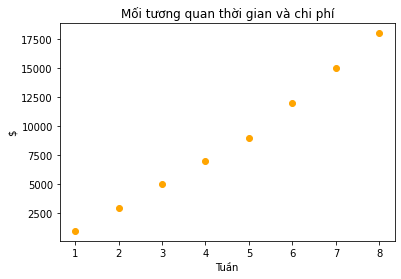

   Thời gian rút ngắn (tuần)  Chi phí rút ngắn ($)  Số cách rút ngắn
0                          1                1000.0                 3
1                          2                3000.0                 7
2                          3                5000.0                 7
3                          4                7000.0                 7
4                          5                9000.0                 4
5                          6               12000.0                 7
6                          7               15000.0                 4
7                          8               18000.0                 1


In [19]:
index_min2 = [cp_min_list2[i][0] for i in range(len(cp_min_list2))] # Trích xuất index của chi phí min từ list trên
#print(index_min)

#Thực hiện vẽ lại đồ thị với chi phí đã lọc
plt.title("Mối tương quan thời gian và chi phí")
plt.scatter(tg_list2,cp_min2,color = ["orange"])
plt.xlabel("Tuần")
plt.ylabel("$")
plt.show()

#Xuất bảng giá trị thời gian rút gọn và chi phí tối thiểu
data_gantt2 = pd.DataFrame(list(zip(tg_list2,cp_min2,dem2)),columns=["Thời gian rút ngắn (tuần)","Chi phí rút ngắn ($)","Số cách rút ngắn"])
print(data_gantt2)

### Bước 5: Đánh giá, tổng kết kết quả
Nhận thấy rằng chi phí rút ngắn tương ứng với mốc thời gian của trường hợp 1 và trường hợp 3 khác nhau ở mốc rút ngắn thời gian 6 và 7 tuần. Tiến hành kiểm tra index_min của hai trường hợp. 

In [20]:
print("Index_min trường hợp 1: "+str(index_min_laps))
print("Index_min trường hợp 3: "+str(index_min_laps2))

Index_min trường hợp 1: ['0', '1,6,23', '18,32,37,46,109,114,131', '126,140,145,154,217,222,239', '234,248,253,262,325,330,347', '342,356,361,370', '363,372,375,774,788,793,802', '377,795,804,807', '809']
Index_min trường hợp 3: ['0,1,5', '4,13,14,28,72,73,77', '76,85,86,100,144,145,149', '148,157,158,172,216,217,221', '220,229,230,244', '232,246,249,508,517,518,532', '251,520,534,537', '539']


Nhận thấy rằng có sự khác nhau giữa hai index_min của hai trường hợp. Tiến hành truy xuất cách thức rút ngắn của các trường hợp tương ứng với các index. 

In [24]:
hs_final1 = list(map(lambda x: list(map(lambda y: hs_cp[y], x)), index_min_lap))
#print(hs_final1)

hs_final2 = list(map(lambda x: list(map(lambda y: hs_cp2[y], x)), index_min_lap2))
#print(hs_final2)

def ShowTGR(list, biens):
    inter = [val for pair in zip(list,biens) for val in pair] #Đan xen hai list thành list mới
    #print(inter)

    rs = listToStr = ''.join(map(str, inter)) # Chuyển list thành string
    #print(rs)
    return rs

#Chuyển list cách thức thành dạng string
Final_Time1 = list(map(lambda x: list(map(lambda y: ShowTGR(y,biens), x)), hs_final1))
#print(Final_Time1)

Final_Time2 = list(map(lambda x: list(map(lambda y: ShowTGR(y,biens), x)), hs_final2))
#print(Final_Time2)

#Biểu diễn các cách thức dạng bảng
max_row = [max(len(Final_Time1[i+1]),len(Final_Time2[i])) for i in range(len(Final_Time2))]
max_row = [len(Final_Time1[0])] + max_row
#print(max_row) 

##Tạo index bằng cách thêm khoảng trống
index_ct = []
for i in range(len(max_row)):
    index_ct.append(i)
    index_ct.extend((max_row[i]-1)*[""])
#print(index_ct)
##Chuyển list of list thành list
Final_Time1s = []  # Điều chỉnh khoảng trống của list cách thức
Final_Time2s = [] 
for i in range(len(max_row)):
    Final_Time1s.append(Final_Time1[i]+list((max_row[i]-len(Final_Time1[i]))*[""]))
#print(Final_Time1s)

for i in range(len(Final_Time2)):
    Final_Time2s.append(Final_Time2[i]+list((max_row[i+1]-len(Final_Time2[i]))*[""]))

#print(Final_Time2s)

def flatten(l): #Chuyên list of lists thành list
    return [item for sublist in l for item in sublist]

Final_Time1ss = flatten(Final_Time1s)
#print(Final_Time1s)
Final_Time2ss = flatten(Final_Time2s)
Final_Time2ss.insert(0,"")
#print(Final_Time2ss)

##Xuất ra bảng
data_ct = pd.DataFrame(list(zip(index_ct,Final_Time1ss,Final_Time2ss)),columns=["Tg rút (tuần)","Gantt 1","Gantt 3"])
print(data_ct)

   Tg rút (tuần)           Gantt 1           Gantt 3
0              0  0a0b0c0d0e0f0g0h                  
1              1  1a0b0c0d0e0f0g0h  1a0b0c0d0e0f0g0h
2                 0a0b1c0d0e0f0g0h  0a0b1c0d0e0f0g0h
3                 0a0b0c0d1e0f0g0h  0a0b0c0d1e0f0g0h
4              2  1a0b1c1d0e0f0g0h  1a0b1c1d0e0f0g0h
5                 1a0b0c1d1e0f0g0h  1a0b0c1d1e0f0g0h
6                 0a0b1c1d1e0f0g0h  0a0b1c1d1e0f0g0h
7                 0a0b0c1d2e0f0g0h  0a0b0c1d2e0f0g0h
8                 1a0b0c0d0e0f1g0h  1a0b0c0d0e0f1g0h
9                 0a0b1c0d0e0f1g0h  0a0b1c0d0e0f1g0h
10                0a0b0c0d1e0f1g0h  0a0b0c0d1e0f1g0h
11             3  1a0b1c1d0e0f1g0h  1a0b1c1d0e0f1g0h
12                1a0b0c1d1e0f1g0h  1a0b0c1d1e0f1g0h
13                0a0b1c1d1e0f1g0h  0a0b1c1d1e0f1g0h
14                0a0b0c1d2e0f1g0h  0a0b0c1d2e0f1g0h
15                1a0b0c0d0e0f2g0h  1a0b0c0d0e0f2g0h
16                0a0b1c0d0e0f2g0h  0a0b1c0d0e0f2g0h
17                0a0b0c0d1e0f2g0h  0a0b0c0d1e

>**Kết quả phân tích cho thấy:**
 > - Các cách thức tối của hai trường hợp giống nhau ở các mốc thời gian.
 > - Có thể nói thời gian và chi phí giảm thiểu tối ưu đạt được khi cả đường 1 và đường 3 cùng là được Gantt

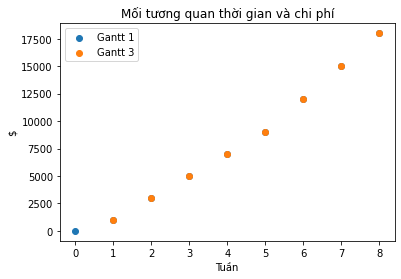

   Tg rút (tuần)  Cp rút ($) Gantt
0              0         0.0     1
1              1      1000.0     1
2              2      3000.0     1
3              3      5000.0     1
4              4      7000.0     1
5              5      9000.0     1
6              6     12000.0     1
7              7     15000.0     1
8              8     18000.0     1


In [22]:
#Đường Găng
gantt_final = ["1","1","1","1","1","1","1","1","1"]

#Thực hiện vẽ lại đồ thị với chi phí đã lọc
plt.title("Mối tương quan thời gian và chi phí")
plt.scatter(tg_list,cp_min)
plt.scatter(tg_list2,cp_min2)
plt.xlabel("Tuần")
plt.ylabel("$")
plt.legend(["Gantt 1","Gantt 3"])
plt.show()

#Xuất bảng giá trị thời gian rút gọn và chi phí tối thiểu
data_gantt1 = pd.DataFrame(list(zip(tg_list,cp_min,gantt_final)),columns=["Tg rút (tuần)","Cp rút ($)","Gantt"])
print(data_gantt1)

<u>**Ví dụ 1:**</u> <b>Muốn rút ngắn 6 tuần (tức tổng thời gian thực hiện là $15 - 6 = 9$ tuần) thì thực hiện rút ngắn tiến độ công việc như sau:</b>

*Cách thức:* 0a1b1c1d2e0f3g0h
- Công việc B giảm 1 tuần 
- Công việc C giảm 1 tuần
- Công việc D giảm 1 tuần
- Công việc E giảm 2 tuần
- Công việc G giảm 3 tuần

Với đường Gantt là đường 3 (Start-B-D-G-H-End) tương ứng thời gian giảm trên đường Gantt là $ 1(B)+1(D)+3(G) = 5 $ tuần &#8594; thời gian thực hiện 14 - 5 = 9 tuần  
Với đường Gantt là đường 1 (Start-A-C-E-G-H-End) tương ứng thời gian giảm trên đường Gantt là $ 1(C)+2(E)+3(G) = 6 $ tuần. &#8594; thời gian thực hiện 15 - 6 = 9 tuần

<b> &#8594; Tổng chi phí rút ngắn là $(B):1*2000 + (C):1*1000 + (D):1*1000 + (E):2*1000 + (G):3*2000  = 12.000$.</b>